In [1]:
# Pandas
import pandas as pd

# SQL Alchemy
from sqlalchemy import create_engine

# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

# Import user and password in cofig file
from config import host, user, pw, port


In [2]:
#get url of postgersql database
url = 'postgresql://{}:{}@{}:{}/{}'
url = url.format(user, pw, host, port, 'employee')
engine = create_engine(url)

In [3]:
#get the data from employees
query = '''SELECT e.emp_id, e.first_name, e.last_name, s.salary, t.title_name 
FROM employees e 
INNER JOIN salary s 
ON (e.emp_id = s.emp_id)
INNER JOIN titles t 
ON (e.emp_titleid = t.title_id)'''

employee_df=pd.read_sql(query, engine)
employee_df.head()

,emp_id,first_name,last_name,salary,title_name
0,57444,Berry,Babb,48973,Engineer
1,13616,Perry,Lorho,40000,Senior Engineer
2,240129,Roddy,Karnin,43548,Technique Leader
3,427958,Feixiong,Poujol,63377,Staff
4,35916,Wonhee,Talmon,40000,Senior Engineer


In [4]:
# Create bins in which to place values 
salary_min=employee_df["salary"].min()
salary_max=employee_df["salary"].max()
print(salary_min,salary_max)
bins=[39999,50000,60000,70000,80000,90000,100000,110000,120000,130000]
# Create labels for these bins
group_labels = ["<50000", "50000-59999","60000-69999","70000-79999","80000-89999","90000-99999","100000-109999","110000-119999",">120000"]

40000 129492


In [5]:
# Place the data series into a new column inside of the DataFrame
employee_df["salary group"] = pd.cut(employee_df["salary"], bins, labels=group_labels)
grouped_salary_df = employee_df.groupby('salary group')
#count employees by group 
salary_count = grouped_salary_df["emp_id"].count()
#create a Data frame with the values
plotrangesalary_df = pd.DataFrame({"Salary Count": salary_count})
plotrangesalary_df

,Salary Count
salary group,
<50000,158472
50000-59999,57917
60000-69999,41405
70000-79999,24814
80000-89999,11844
90000-99999,4285
100000-109999,1068
110000-119999,195
>120000,24


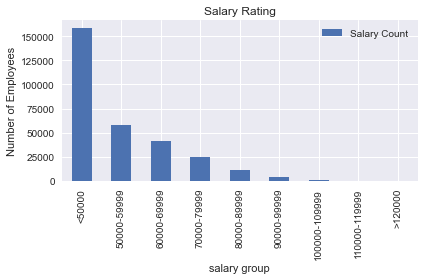

In [12]:
# visualize the most common salary ranges for employees
plotrangesalary_df.plot.bar(title="Salary Rating")
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.savefig("Images/chart_salaryrating.png")
plt.show()

In [10]:
#group by title
grouped_title_df = employee_df.groupby('title_name')
#count employees by title
salary_mean = grouped_title_df["salary"].mean()
#create a Data frame with the values
plottitlesalary_df = pd.DataFrame({"Salary Mean": salary_mean})
plottitlesalary_df

,Salary Mean
title_name,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


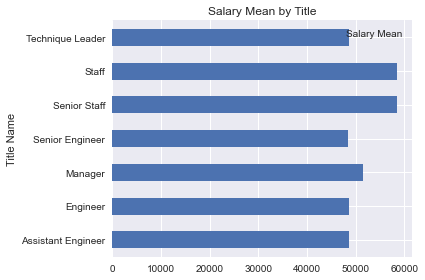

In [11]:
# Create a bar chart of average salary by title
plottitlesalary_df.plot.barh(title="Salary Mean by Title")
plt.ylabel('Title Name')
plt.tight_layout()
plt.savefig("Images/chart_salarymeanbytitle.png")
plt.show()